In [1759]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [1760]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_full = df_train.append(df_test,ignore_index=True)

In [1761]:
print df_train.info()
print df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1762]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

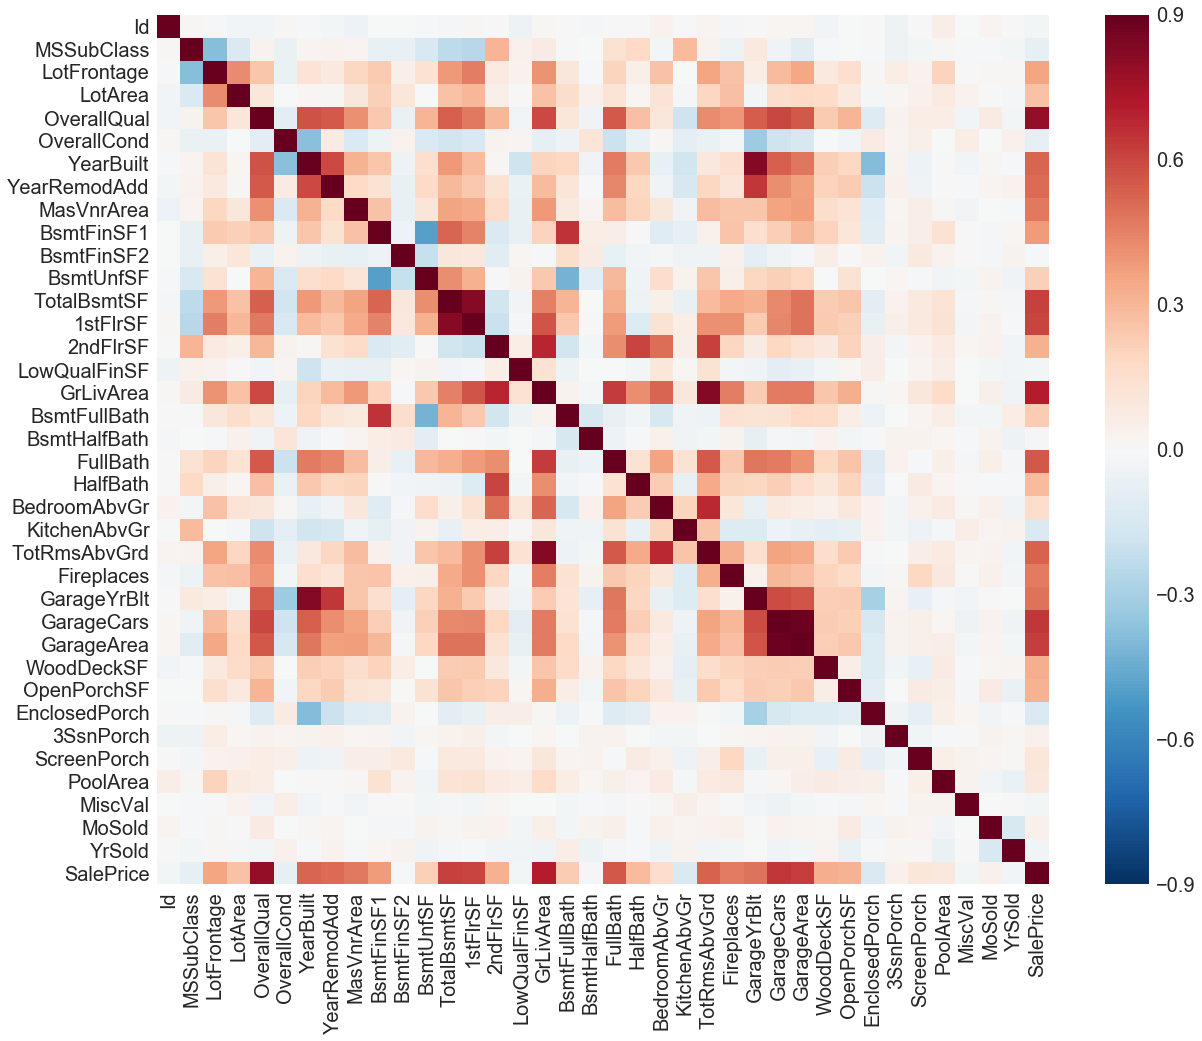

In [1763]:
corr_matirx = df_train.corr()
fig = plt.figure(figsize=(20,16))
sns.set(font_scale=2)
sns.heatmap(corr_matirx,vmax=0.9)
plt.show()

In [1764]:
largest_corr_whith_saleprice = corr_matirx.nlargest(10,'SalePrice')['SalePrice']
largest_corr_whith_saleprice

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [1765]:
corr_cols_with_saleprice = corr_matirx.nlargest(10,'SalePrice')['SalePrice'].index
corr_with_saleprice = np.corrcoef(df_train[corr_cols_with_saleprice].values.T)
# corr_with_saleprice

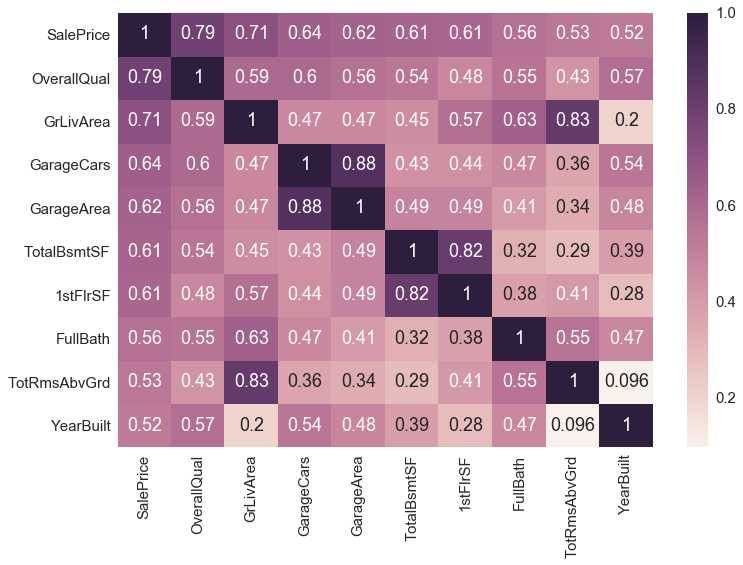

In [1766]:
fig = plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.heatmap(corr_with_saleprice,xticklabels=corr_cols_with_saleprice.values,yticklabels=corr_cols_with_saleprice.values,annot=True)

In [1767]:
num_missing_train = df_train.isnull().sum().sort_values(ascending=False)
percent_missing_train = (df_train.isnull().sum() / len(df_train)).sort_values(ascending=False)
missing_data_train = pd.concat([num_missing_train,percent_missing_train],axis=1,keys=['Number','Percent'])
missing_data_train.head(30)

,Number,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [1768]:
num_missing_test = df_test.isnull().sum().sort_values(ascending=False)
percent_missing_test = (df_test.isnull().sum() / len(df_test)).sort_values(ascending=False)
missing_data_test = pd.concat([num_missing_test,percent_missing_test],axis=1,keys=['Number','Percent'])
missing_data_test.head(30)

,Number,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [1769]:
print df_train.SalePrice.corr(df_train.LotFrontage)
print df_train.LotFrontage.corr(df_train.LotArea)
print df_test.LotFrontage.corr(df_test.LotArea)

0.351799096571
0.426095018772
0.644608497776


In [1770]:
df_full['LotFrontage_sqrt'] = np.sqrt(df_full.LotArea)
print df_full.LotFrontage_sqrt.corr(df_full.LotFrontage)

0.647658039862


In [1771]:
df_full.loc[df_full.LotFrontage.isnull(),'LotFrontage'] = df_full.loc[df_full.LotFrontage.isnull(),'LotFrontage_sqrt']
# df_full = df_full.drop('LotFrontage_sqrt',axis=1)
df_full.LotFrontage.isnull().sum()

0

In [1772]:
print df_test['MSZoning'].count()
print len(df_test)
missing_MSZoning = df_full[['MSSubClass','MSZoning']][df_full.MSZoning.isnull()]
missing_MSZoning

1455
1459


,MSSubClass,MSZoning
1915,30,NaN
2216,20,NaN
2250,70,NaN
2904,20,NaN


In [1773]:
pd.crosstab(df_full.MSSubClass,df_full.MSZoning)

MSZoning,C (all),FV,RH,RL,RM
MSSubClass,,,,,
20,3,34,4,1016,20
30,8,0,2,61,67
40,0,0,0,4,2
45,0,0,1,6,11
50,7,0,2,159,119
60,0,43,0,529,3
70,4,0,3,57,63
75,0,0,0,9,14
80,0,0,0,115,3


In [1774]:
missing_MSZoning.loc[missing_MSZoning.MSSubClass == 20,'MSZoning'] = 'RL'
missing_MSZoning.loc[missing_MSZoning.MSZoning.isnull(),'MSZoning'] = 'RM'
missing_MSZoning

,MSSubClass,MSZoning
1915,30,RM
2216,20,RL
2250,70,RM
2904,20,RL


In [1775]:
df_full.loc[df_full.MSZoning.isnull(),'MSZoning'] = missing_MSZoning
df_full.MSZoning.isnull().sum()

0

In [1776]:
pd.crosstab(df_full.Exterior1st,df_full.Exterior2nd)

Exterior2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
Exterior1st,,,,,,,,,,,,,,,,
AsbShng,35,0,0,0,0,1,0,0,0,0,5,0,1,1,1,0
AsphShn,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkComm,0,0,4,0,0,0,0,0,0,0,0,0,1,0,1,0
BrkFace,1,0,0,44,0,0,3,0,3,0,8,3,3,1,20,1
CBlock,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
CemntBd,0,0,0,0,0,124,0,0,0,0,0,0,0,0,1,1
HdBoard,0,1,0,1,0,0,383,6,1,0,41,0,1,0,3,5
ImStucc,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
MetalSd,0,1,0,0,1,0,3,0,437,0,0,0,3,2,2,1


In [1777]:
df_full[df_full.Exterior1st.isnull() | df_full.Exterior2nd.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,LotFrontage_sqrt
2151,1518,0,0,NaN,2,1Fam,TA,Gd,1035.0,0.0,...,0,Pave,5,1580.0,AllPub,0,1940,2007,2008,139.821315


In [1778]:
df_full.loc[df_full.Exterior1st.isnull(),'Exterior1st'] = 'VinylSd'
df_full.loc[df_full.Exterior2nd.isnull(),'Exterior2nd'] = 'VinylSd'
df_full.Exterior1st.isnull().sum()

0

In [1779]:
print df_full.MasVnrType.isnull().sum()
df_full.MasVnrType.fillna('None',inplace=True)
df_full.MasVnrArea.fillna(0.0,inplace=True)
print df_full.MasVnrType.isnull().sum()

24
0


In [1780]:
Qual_dict = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    np.NaN:0
}
df_full.BsmtQual = df_full.BsmtQual.map(Qual_dict)
df_full.BsmtCond = df_full.BsmtCond.map(Qual_dict)

In [1781]:
print df_full.KitchenQual.value_counts()
print df_full.Functional.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64


In [1782]:
df_full.loc[df_full.KitchenQual.isnull(),'KitchenQual'] = 'TA'
df_full.loc[df_full.Functional.isnull(),'Functional'] = 'Typ'

In [1783]:
df_full.KitchenQual.map(Qual_dict)

0       4
1       3
2       4
3       4
4       4
5       3
6       4
7       3
8       3
9       3
10      3
11      5
12      3
13      4
14      3
15      3
16      3
17      3
18      4
19      3
20      4
21      4
22      4
23      3
24      4
25      4
26      4
27      4
28      3
29      2
       ..
2889    2
2890    4
2891    3
2892    3
2893    3
2894    5
2895    4
2896    2
2897    3
2898    4
2899    3
2900    3
2901    4
2902    4
2903    5
2904    3
2905    3
2906    3
2907    3
2908    3
2909    3
2910    3
2911    3
2912    3
2913    3
2914    3
2915    3
2916    3
2917    3
2918    3
Name: KitchenQual, Length: 2919, dtype: int64

In [1784]:
Functional_dict = {
    'Typ':8,
    'Min1':7,
    'Min2':6,
    'Mod':5,
    'Maj1':4,
    'Maj2':3,
    'Sev':2,
    'Sal':1
}
df_full.Functional.map(Functional_dict)

0       8
1       8
2       8
3       8
4       8
5       8
6       8
7       8
8       7
9       8
10      8
11      8
12      8
13      8
14      8
15      8
16      8
17      8
18      8
19      7
20      8
21      8
22      8
23      8
24      8
25      8
26      8
27      8
28      8
29      8
       ..
2889    8
2890    8
2891    5
2892    6
2893    8
2894    8
2895    8
2896    8
2897    8
2898    8
2899    8
2900    8
2901    8
2902    8
2903    8
2904    5
2905    8
2906    8
2907    8
2908    8
2909    8
2910    8
2911    8
2912    8
2913    8
2914    8
2915    8
2916    8
2917    8
2918    8
Name: Functional, Length: 2919, dtype: int64

In [1785]:
pd.crosstab(df_full.Fireplaces,df_full.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,37,63,627,46,495
2,5,10,112,0,92
3,1,1,5,0,4
4,0,0,0,0,1


In [1786]:
missing_FireplaceQu = df_full[['FireplaceQu','Fireplaces']][df_full.FireplaceQu.isnull()]
missing_FireplaceQu.loc[df_full.Fireplaces == 1,'FireplaceQu'] = 'Gd'
missing_FireplaceQu.loc[df_full.Fireplaces == 2,'FireplaceQu'] = 'Gd'
missing_FireplaceQu.loc[df_full.Fireplaces == 3,'FireplaceQu'] = 'Gd'
missing_FireplaceQu.loc[df_full.Fireplaces == 4,'FireplaceQu'] = 'TA'
missing_FireplaceQu.loc[df_full.Fireplaces == 0,'FireplaceQu'] = 'None'
df_full.loc[df_full.FireplaceQu.isnull(),'FireplaceQu']  = missing_FireplaceQu

In [1787]:
df_full[['FireplaceQu','Fireplaces']]

,FireplaceQu,Fireplaces
0,None,0
1,TA,1
2,TA,1
3,Gd,1
4,TA,1
5,None,0
6,Gd,1
7,TA,2
8,TA,2
9,TA,2


In [1788]:
garage_cols = ['GarageType', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea']
for col in garage_cols:
    if df_full[col].dtype == np.object:
        df_full.loc[df_full[col].isnull(),col] = 'None'
    else:
        df_full.loc[df_full[col].isnull(),col] = 0
df_full[garage_cols]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
0,Attchd,TA,TA,2003.0,RFn,2.0,548.0
1,Attchd,TA,TA,1976.0,RFn,2.0,460.0
2,Attchd,TA,TA,2001.0,RFn,2.0,608.0
3,Detchd,TA,TA,1998.0,Unf,3.0,642.0
4,Attchd,TA,TA,2000.0,RFn,3.0,836.0
5,Attchd,TA,TA,1993.0,Unf,2.0,480.0
6,Attchd,TA,TA,2004.0,RFn,2.0,636.0
7,Attchd,TA,TA,1973.0,RFn,2.0,484.0
8,Detchd,Fa,TA,1931.0,Unf,2.0,468.0
9,Attchd,Gd,TA,1939.0,RFn,1.0,205.0


In [1789]:
df_full = df_full.drop(['Alley','PoolQC'],axis=1)

In [1790]:
df_full.loc[df_full.MiscFeature.isnull(),'MiscFeature'] = 'None'
df_full.loc[df_full.Fence.isnull(),'Fence'] = 'None'

In [1791]:
print df_full['SaleType'].isnull().sum()
df_full.SaleType.value_counts()

1


WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [1792]:
df_full.loc[df_full.SaleType.isnull(),'SaleType'] = 'WD'

In [1793]:
print df_full['Electrical'].isnull().sum()
df_full.Electrical.value_counts()

1


SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [1794]:
df_full.loc[df_full.Electrical.isnull(),'Electrical'] = 'SBrkr'

In [1795]:
print df_full.Utilities.value_counts()
df_full.loc[df_full.Utilities.isnull(),'Utilities'] = 'AllPub'

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [1796]:
basement_cols = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2']
df_full[basement_cols]
for col in basement_cols:
    if 'SF' not in col:
        df_full.loc[df_full[col].isnull(),col] = 'None'
    else:
        df_full.loc[df_full[col].isnull(),col] = 0.0
# df_full[basement_cols]

In [1797]:
bath_cols = ['BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF']
for col in bath_cols:
    print df_full[col].value_counts()
    df_full.loc[df_full[col].isnull(),col] = 0.0

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
768.0     24
816.0     23
728.0     20
1008.0    19
780.0     19
384.0     19
960.0     18
894.0     17
756.0     17
832.0     17
546.0     16
936.0     16
720.0     16
600.0     16
848.0     16
483.0     14
630.0     13
952.0     13
840.0     13
988.0     12
624.0     12
876.0     11
784.0     11
796.0     11
1056.0    10
          ..
1967.0     1
1905.0     1
1679.0     1
1533.0     1
2140.0     1
1994.0     1
1378.0     1
763.0      1
1047.0     1
1376.0     1
904.0      1
370.0      1
1570.0     1
2033.0     1
1709.0     1
1519.0     1
2077.0     1
1550.0     1
797.0      1
699.0      1
559.0      1
396.0      1
1866.0     1
1641.0     1
961.0      1
1949.0     1
1231.0     1
1829.0     1
1475.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64
0.0       2

In [1798]:
df_full.MoSold

0        2
1        5
2        9
3        2
4       12
5       10
6        8
7       11
8        4
9        1
10       2
11       7
12       9
13       8
14       5
15       7
16       3
17      10
18       6
19       5
20      11
21       6
22       9
23       6
24       5
25       7
26       5
27       5
28      12
29       5
        ..
2889     3
2890     4
2891    10
2892    10
2893     4
2894     2
2895    12
2896     9
2897    10
2898     5
2899     5
2900     3
2901    10
2902    11
2903     9
2904     5
2905    11
2906     5
2907    10
2908     3
2909     4
2910     5
2911     5
2912    12
2913     6
2914     6
2915     4
2916     9
2917     7
2918    11
Name: MoSold, Length: 2919, dtype: int64

In [1799]:
df_full = df_full.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})
df_full.MoSold

0       Feb
1       May
2       Sep
3       Feb
4       Dec
5       Oct
6       Aug
7       Nov
8       Apr
9       Jan
10      Feb
11      Jul
12      Sep
13      Aug
14      May
15      Jul
16      Mar
17      Oct
18      Jun
19      May
20      Nov
21      Jun
22      Sep
23      Jun
24      May
25      Jul
26      May
27      May
28      Dec
29      May
       ... 
2889    Mar
2890    Apr
2891    Oct
2892    Oct
2893    Apr
2894    Feb
2895    Dec
2896    Sep
2897    Oct
2898    May
2899    May
2900    Mar
2901    Oct
2902    Nov
2903    Sep
2904    May
2905    Nov
2906    May
2907    Oct
2908    Mar
2909    Apr
2910    May
2911    May
2912    Dec
2913    Jun
2914    Jun
2915    Apr
2916    Sep
2917    Jul
2918    Nov
Name: MoSold, Length: 2919, dtype: object

In [1800]:
df_full['OverallQual_S2'] =df_full.OverallQual ** 2
df_full['OverallQual_S3'] =df_full.OverallQual ** 3
df_full['GrLivArea_S2'] =df_full.GrLivArea ** 2
df_full['GrLivArea_S3'] =df_full.GrLivArea ** 3

In [1801]:
df_full.MSSubClass = df_full.MSSubClass.astype(str)
df_full.MSSubClass

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
       ... 
2889     30
2890     50
2891     30
2892    190
2893     50
2894    120
2895    120
2896     20
2897     90
2898     20
2899     80
2900     20
2901     20
2902     20
2903     20
2904     20
2905     90
2906    160
2907     20
2908     90
2909    180
2910    160
2911     20
2912    160
2913    160
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: object

In [1802]:
num_missing_full = df_full.isnull().sum().sort_values(ascending=False)
percent_missing_full = (df_full.isnull().sum() / len(df_full)).sort_values(ascending=False)
missing_data_full = pd.concat([num_missing_full,percent_missing_full],axis=1,keys=['Number','Percent'])
missing_data_full

,Number,Percent
SalePrice,1459,0.499829
GrLivArea_S3,0,0.000000
Functional,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
Fence,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Foundation,0,0.000000
FullBath,0,0.000000


In [1803]:
numeric_cols = df_full.columns[df_full.dtypes != np.object]
numerical_cols_mean = df_full.loc[:,numeric_cols].mean()
numerical_cols_std = df_full.loc[:,numeric_cols].std()
df_full.loc[:,numeric_cols] = (df_full.loc[:,numeric_cols] - numerical_cols_mean) / numerical_cols_std

In [1804]:
for col in df_full.columns:
    if df_full[col].dtype == np.object:
        dummies = pd.get_dummies(df_full[col],prefix=col)
        df_full = pd.concat([df_full,dummies],axis=1)
        df_full = df_full.drop(col,axis=1)

In [1805]:
df_full

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtQual,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,-0.773728,1.207172,-0.103313,0.169898,0.141812,0.581046,-0.292975,1.087148,-0.249676,0.576995,...,0,0,0,0,0,1,0,1,1,0
1,0.261030,-0.784891,-0.103313,0.169898,0.141812,1.178053,-0.292975,-0.818789,3.821854,0.576995,...,0,0,0,0,0,1,0,1,1,0
2,-0.610614,1.235163,-0.103313,0.169898,0.141812,0.098173,-0.292975,1.087148,-0.249676,0.576995,...,0,0,0,0,0,1,0,1,1,0
3,-0.506118,0.978574,-0.103313,0.169898,1.881095,-0.494445,-0.292975,1.087148,-0.249676,-0.527431,...,0,0,0,0,0,1,0,1,1,0
4,-0.037164,1.671364,-0.103313,1.385418,0.141812,0.469107,-0.292975,1.087148,-0.249676,0.576995,...,0,0,0,0,0,1,0,1,1,0
5,-0.926648,0.535376,12.601064,-2.261142,0.141812,0.638113,-0.292975,1.087148,-0.249676,0.576995,...,0,0,0,0,0,1,0,1,1,0
6,1.362054,-0.784891,-0.103313,0.169898,0.141812,2.036251,-0.292975,1.087148,-0.249676,1.681421,...,0,0,0,0,0,1,0,1,1,0
7,-0.134013,1.508080,-0.103313,0.169898,0.141812,0.916862,-0.103826,1.087148,-0.249676,0.576995,...,0,0,0,0,0,1,0,1,1,0
8,-0.350650,0.969244,-0.103313,-1.045622,0.141812,-0.968539,-0.292975,-0.818789,-0.249676,-0.527431,...,0,0,0,0,0,1,0,1,1,0
9,-0.210473,-0.784891,-0.103313,-1.045622,0.141812,0.899303,-0.292975,1.087148,-0.249676,-0.527431,...,0,0,0,0,0,1,0,1,1,0


In [1806]:
from sklearn.ensemble import RandomForestRegressor
feature_estimator = RandomForestRegressor(n_estimators=400)

In [1807]:
X_train_valid = df_full[:len(df_train)].drop(['Id','SalePrice'],axis=1)
y_train_valid = df_full.SalePrice[:len(df_train)] 

In [1808]:
feature_estimator.fit(X_train_valid,y_train_valid)
feature_imp = feature_estimator.feature_importances_
feature_imp = pd.DataFrame({'Feature': X_train_valid.columns,'Score': feature_imp})
feature_imp = feature_imp.sort_values('Score',ascending=False)
feature_imp.to_csv('Feature_Importance.csv',index=False)
feature_imp

,Feature,Score
38,OverallQual_S3,2.072375e-01
37,OverallQual_S2,1.894285e-01
27,OverallQual,1.816144e-01
31,TotalBsmtSF,4.030658e-02
17,GrLivArea,3.939923e-02
39,GrLivArea_S2,3.767596e-02
1,2ndFlrSF,3.406746e-02
40,GrLivArea_S3,3.260237e-02
5,BsmtFinSF1,2.817069e-02
15,GarageCars,2.422783e-02


In [1809]:
features_sel = feature_imp['Feature'][:100]

In [1810]:
X_full = df_full.loc[:,features_sel]
X_train_valid = X_full[:len(df_train)]
y_train_valid = np.log1p(df_train.SalePrice[:len(df_train)]) 

In [1811]:
from sklearn import cross_validation

X_train,X_valid,y_train,y_valid = cross_validation.train_test_split(X_train_valid,y_train_valid,test_size=0.3,random_state=123)

In [1812]:
print X_train_valid.shape,y_train_valid.shape,X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

(1460, 100) (1460L,) (1022, 100) (1022L,) (438, 100) (438L,)


In [1813]:
from sklearn.ensemble import GradientBoostingRegressor

In [1814]:
model_train =  GradientBoostingRegressor(
                random_state=0,
                learning_rate=0.010, 
                min_samples_split=2,
                max_features='sqrt',   
                n_estimators=1000,
                min_samples_leaf=1,
                subsample=0.2,
                max_depth=3,
            )
model_train.fit(X_train,y_train)
print model_train.score(X_train,y_train,),model_train.score(X_valid,y_valid)

0.943483694683 0.918608251998


In [1815]:
print np.mean(np.sqrt(-cross_validation.cross_val_score(model_train,X_train_valid,y_train_valid,cv=5,scoring='neg_mean_squared_error')))

0.125114020056


In [1816]:
X_test = X_full[len(df_train):]
print X_test.shape

(1459, 100)


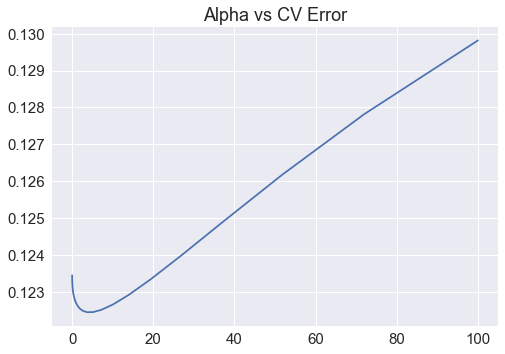

In [1817]:
from sklearn.linear_model import Ridge
alphas = np.logspace(-5,2,50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_validation.cross_val_score(clf,X_train_valid,y_train_valid,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(alphas,test_scores)
plt.title('Alpha vs CV Error')
plt.show()

best_alpha = alphas[np.array(test_scores).argmin()]

In [1818]:
model_ridge = Ridge(best_alpha)
model_ridge.fit(X_train,y_train)
print np.mean(np.sqrt(-cross_validation.cross_val_score(model_ridge,X_train_valid,y_train_valid,cv=5,scoring='neg_mean_squared_error')))

0.124213718806


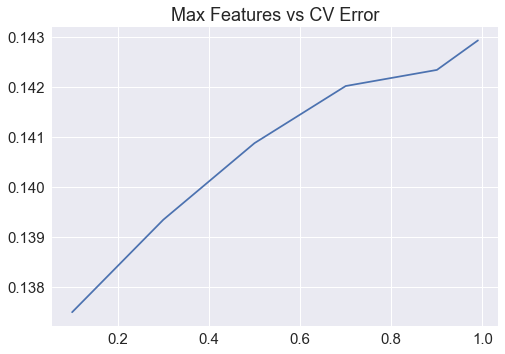

In [1819]:
max_features = [.1,.3,.5,.7,.9,.99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators = 400,max_features = max_feat)
    test_score = np.sqrt(-cross_validation.cross_val_score(clf,X_train_valid,y_train_valid,cv = 5,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(max_features,test_scores)
plt.title('Max Features vs CV Error')
plt.show()

best_max_feature = max_features[np.array(test_scores).argmin()]

In [1820]:
model_rf = RandomForestRegressor(n_estimators=400,max_features=best_max_feature)
model_rf.fit(X_train,y_train)
print np.mean(np.sqrt(-cross_validation.cross_val_score(model_rf,X_train_valid,y_train_valid,cv=5,scoring='neg_mean_squared_error')))

0.137308567889


In [1821]:
from sklearn.linear_model import Lasso

best_alpha = 0.0002

model_lasso = Lasso(alpha=best_alpha, max_iter=1000)
model_lasso.fit(X_train,y_train)
print np.mean(np.sqrt(-cross_validation.cross_val_score(model_lasso,X_train_valid,y_train_valid,cv=5,scoring='neg_mean_squared_error')))

0.123810647998


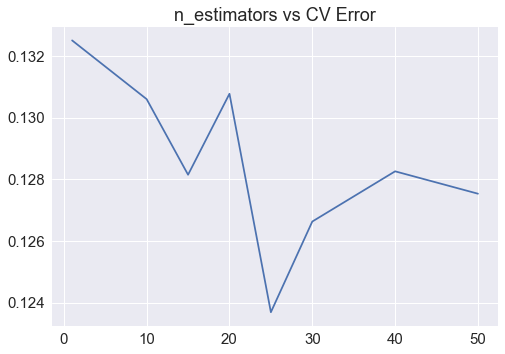

In [1822]:
from sklearn.ensemble import BaggingRegressor
ridge = Ridge(best_alpha)
params = [1,10,15,20,25,30,40,50]
test_scores = []
for param in params:
    clf = BaggingRegressor(base_estimator = ridge,n_estimators = param)
    test_score = np.sqrt(-cross_validation.cross_val_score(clf,X_train_valid,y_train_valid,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(params,test_scores)
plt.title('n_estimators vs CV Error')
plt.show()

In [1823]:
model_br_ridge = BaggingRegressor(base_estimator=ridge,n_estimators=25)
model_br_ridge.fit(X_train,y_train)
print np.mean(np.sqrt(-cross_validation.cross_val_score(model_br_ridge,X_train_valid,y_train_valid,cv=5,scoring='neg_mean_squared_error')))

0.129692863037


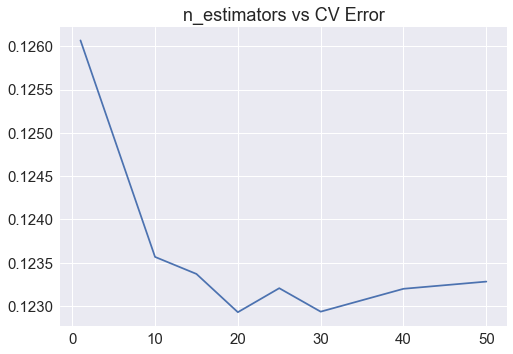

In [1824]:
GBDT =  GradientBoostingRegressor(
                random_state=0,
                learning_rate=0.010, 
                min_samples_split=2,
                max_features='sqrt',   
                n_estimators=1000,
                min_samples_leaf=1,
                subsample=0.2,
                max_depth=3,
            )
params = [1,10,15,20,25,30,40,50]
test_scores = []
for param in params:
    clf = BaggingRegressor(base_estimator = GBDT,n_estimators = param)
    test_score = np.sqrt(-cross_validation.cross_val_score(clf,X_train_valid,y_train_valid,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(params,test_scores)
plt.title('n_estimators vs CV Error')
plt.show()

In [1749]:
model_br_gbdt = BaggingRegressor(base_estimator=GBDT,n_estimators=10)
model_br_gbdt.fit(X_train,y_train)
print np.mean(np.sqrt(-cross_validation.cross_val_score(model_br,X_train_valid,y_train_valid,cv=5,scoring='neg_mean_squared_error')))

0.12681019132


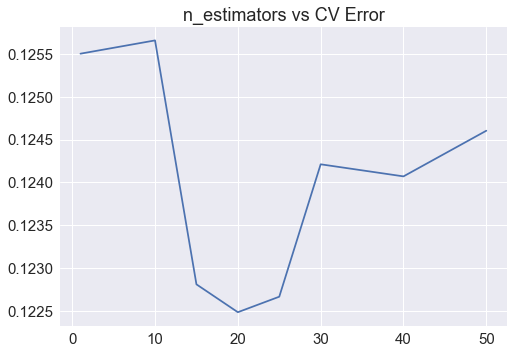

In [1750]:
lasso = Lasso(alpha=0.0002, max_iter=1000)
params = [1,10,15,20,25,30,40,50]
test_scores = []
for param in params:
    clf = BaggingRegressor(base_estimator=lasso,n_estimators = param)
    test_score = np.sqrt(-cross_validation.cross_val_score(clf,X_train_valid,y_train_valid,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(params,test_scores)
plt.title('n_estimators vs CV Error')
plt.show()

In [1751]:
model_br_lasso = BaggingRegressor(base_estimator=lasso,n_estimators=10)
model_br_lasso.fit(X_train,y_train)
print np.mean(np.sqrt(-cross_validation.cross_val_score(model_br_lasso,X_train_valid,y_train_valid,cv=5,scoring='neg_mean_squared_error')))

0.12568732753


from sklearn.ensemble import AdaBoostRegressor
ms = [10,15,20,25,30,35,40,45,50]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(base_estimator = GBDT,n_estimators = param)
    test_score = np.sqrt(-cross_validation.cross_val_score(clf,X_train_valid,y_train_valid,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(params,test_scores)
plt.title('n_estimators vs CV Error')
plt.show()

In [1752]:
model_abr_gbdt = AdaBoostRegressor(base_estimator=GBDT,n_estimators=10)
model_abr_gbdt.fit(X_train,y_train)
print np.mean(np.sqrt(-cross_validation.cross_val_score(model_abr_gbdt,X_train_valid,y_train_valid,cv=5,scoring='neg_mean_squared_error')))

0.126342045758


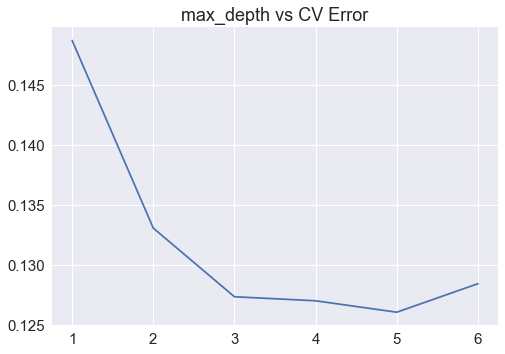

In [1753]:
from xgboost import XGBRegressor
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)
    test_score = np.sqrt(-cross_validation.cross_val_score(clf,X_train_valid,y_train_valid,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params,test_scores)
plt.title('max_depth vs CV Error')
plt.show()

In [1754]:
model_xgb = XGBRegressor(max_depth =3)
model_xgb.fit(X_train,y_train)
print np.mean(np.sqrt(-cross_validation.cross_val_score(model_xgb,X_train_valid,y_train_valid,cv=5,scoring='neg_mean_squared_error')))

0.128537692721


In [1757]:
prediction_GBDT = np.expm1(model_train.predict(X_test))
prediction_ridge = np.expm1(model_ridge.predict(X_test))
prediction_lasso = np.expm1(model_lasso.predict(X_test))
prediction_br_gbdt = np.expm1(model_br_gbdt.predict(X_test))
prediction_br_ridge = np.expm1(model_br_ridge.predict(X_test))
prediction_br_lasso = np.expm1(model_br_lasso.predict(X_test))
prediction_abr_gbdt = np.expm1(model_abr_gbdt.predict(X_test))
# prediction_xgb = np.expm1(model_xgb.predict(X_test))
prediction = (prediction_GBDT + prediction_ridge + prediction_lasso + prediction_br_gbdt + prediction_br_ridge + prediction_br_lasso + prediction_abr_gbdt) / 7
df_result = pd.DataFrame({'Id':df_test.Id,'SalePrice':prediction})
df_result

,Id,SalePrice
0,1461,117754.628511
1,1462,156481.535137
2,1463,178196.285924
3,1464,191234.464395
4,1465,190729.846032
5,1466,172466.396516
6,1467,179744.170251
7,1468,161298.034323
8,1469,190214.378798
9,1470,119817.623087


In [1758]:
df_result.to_csv('HousePrice_result_20180822.csv',index=None)